In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_description = pd.read_csv('DataDescription.csv')

In [3]:
data_description.head()

,Column Name,Variable Name,Content
0,laufkont,status,status of the debtor's checking account with t...
1,laufzeit,duration,credit duration in months (quantitative)
2,moral,credit_history,history of compliance with previous or concurr...
3,verw,purpose,purpose for which the credit is needed (catego...
4,hoehe,amount,credit amount in DM (quantitative; result of m...


In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [6]:
data_description.shape

(21, 3)

The plan is to rename the index of df_train with the values in the data_description's Variable Name column

In [7]:
#lets get the values of the variable column

In [8]:
column_values = data_description['Variable Name'].tolist()

In [9]:
column_values

['status',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

In [10]:
df_train.drop('Id',axis=1,inplace=True)

In [11]:
df_train.columns = column_values

In [12]:
df_train.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1


Great so now we have changed the column names for better understanding

# Exploratory Data Analysis

In [13]:
df_train.shape

(800, 21)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   800 non-null    int64
 1   duration                 800 non-null    int64
 2   credit_history           800 non-null    int64
 3   purpose                  800 non-null    int64
 4   amount                   800 non-null    int64
 5   savings                  800 non-null    int64
 6   employment_duration      800 non-null    int64
 7   installment_rate         800 non-null    int64
 8   personal_status_sex      800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  present_residence        800 non-null    int64
 11  property                 800 non-null    int64
 12  age                      800 non-null    int64
 13  other_installment_plans  800 non-null    int64
 14  housing                  800 non-null    int64
 15  number

In [15]:
df_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<b>All Int columns, no null values present</b>

# Looking for Outliers

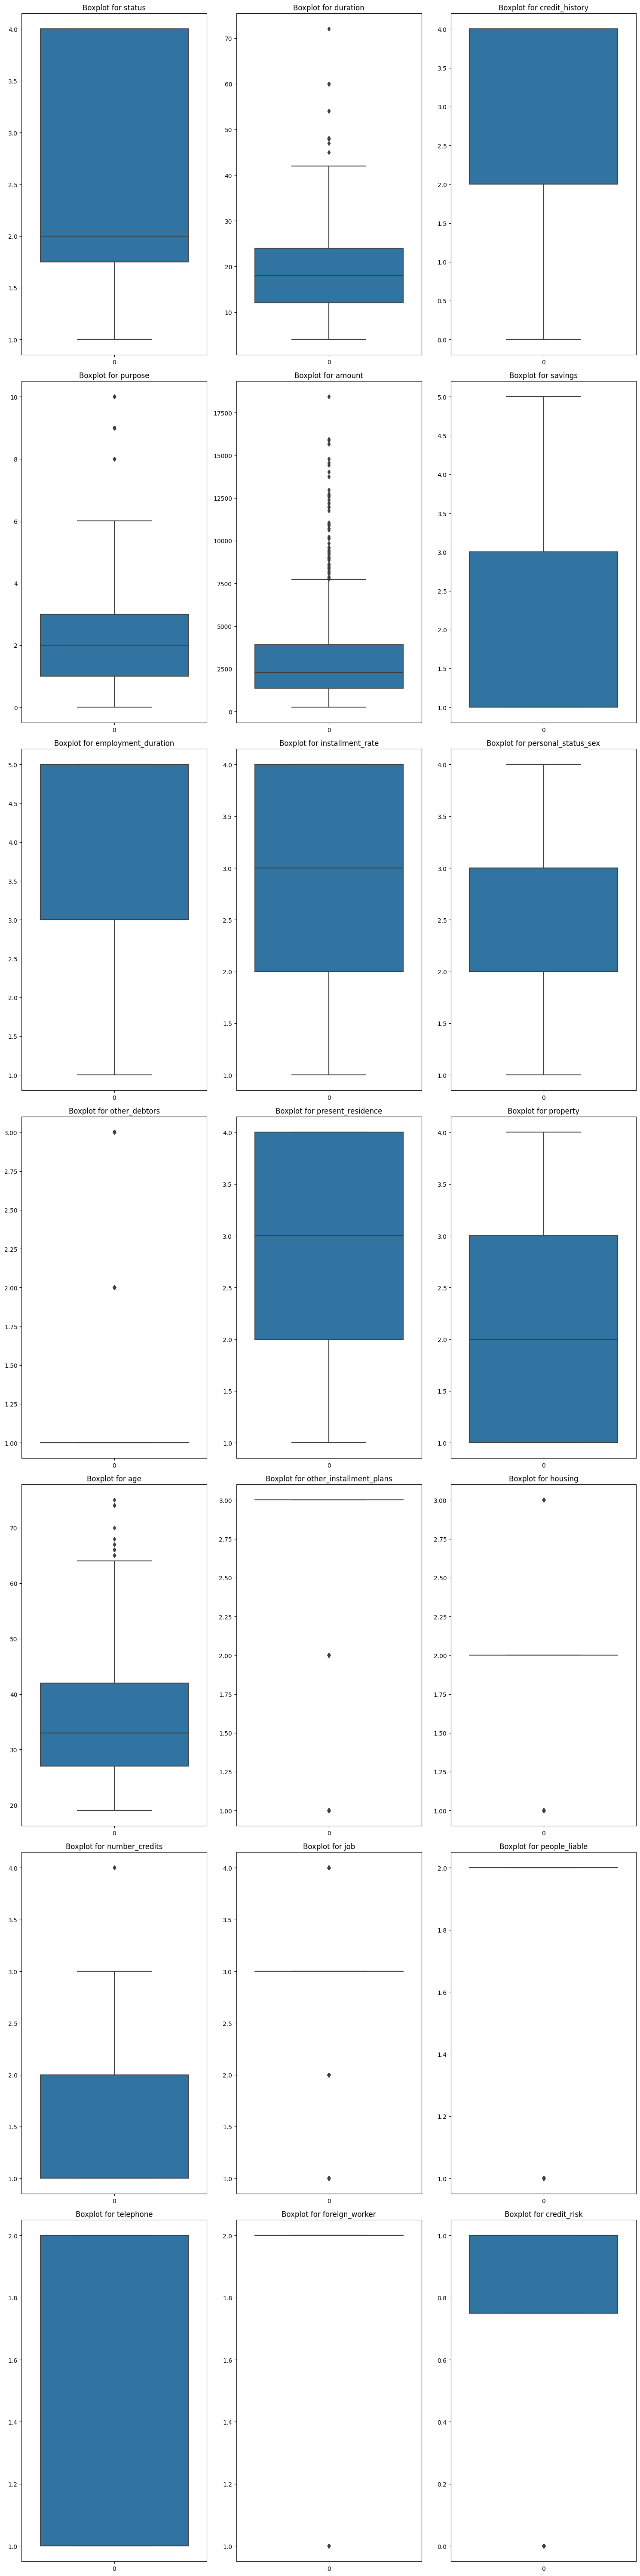

In [16]:
num_columns = 3  # Number of boxplots per row
num_rows = (len(column_values) + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 60))

# Loop through the columns and create boxplots
for i, column in enumerate(column_values):
    row = i // num_columns  # Calculate the row index
    col = i % num_columns  # Calculate the column index
    
    sns.boxplot(data=df_train[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
df_train.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1


In [18]:
df_train['status'].unique()

array([1, 2, 4, 3], dtype=int64)

Checking the value counts

In [19]:
df_train['status'].value_counts()

4    334
2    215
1    200
3     51
Name: status, dtype: int64

a. There are more number of Accounts having balance greater or equal to 200<br>
b. 215 accounts have checking balance as 0<br>
c. 200 population don't have an account<br>
d. Very few (51) accounts have balance between 0 and 200<br>

In [20]:
#check which type of account is prone to failure

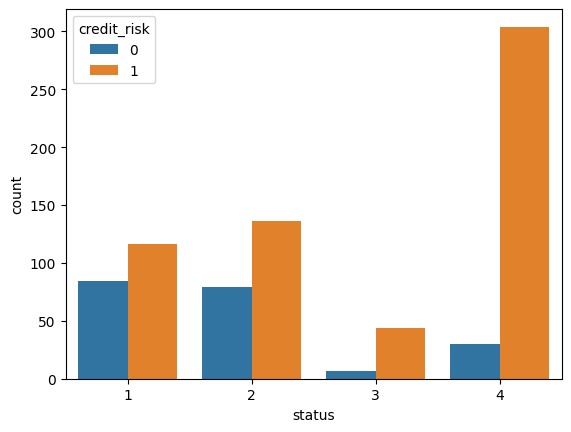

In [21]:
sns.countplot(x='status', hue='credit_risk', data=df_train)
plt.show()

conclusion: <br>
a. For customers with account balance greater than or equal to 200 DM have the least fraud rate. (Account 4) <br>
b. For customers with no account and account balance less than 0 have most fraud committed. (Account 1 and 2) <br>
c. However the interesting observation is that the number of fraud by no account and account balance less than 0 have more good than bad. (Account 1 and Account 2) <br>
d. Account type 3 has very few outcomes to take into consideration <br>

In [22]:
df_train[['duration','purpose']].head()

,duration,purpose
0,18,2
1,9,0
2,12,9
3,12,0
4,10,0


In [23]:
#checking for which purpose takes the longest time

In [24]:
purpose_mapping = {
    0: 'others',
    1: 'car (new)',
    2: 'car (used)',
    3: 'furniture/equipment',
    4: 'radio/television',
    5: 'domestic appliances',
    6: 'repairs',
    7: 'education',
    8: 'vacation',
    9: 'retraining',
    10: 'business'
}

# Map purpose codes to descriptions
df_train['purpose_description'] = df_train['purpose'].map(purpose_mapping)

# Calculate the average duration for each purpose
average_duration_by_purpose = df_train.groupby('purpose_description')['duration'].mean()

# Print the results
print(average_duration_by_purpose)

purpose_description
business               34.400000
car (new)              26.046512
car (used)             18.798611
domestic appliances    18.285714
furniture/equipment    19.973568
others                 18.075676
radio/television       15.000000
repairs                20.750000
retraining             25.470588
vacation               11.750000
Name: duration, dtype: float64


From the average duration values for each purpose category, we can draw the following conclusions:<br>

    Business has the longest average duration to repay the loan, with an average of approximately 34.4 months.

    Car (new) also takes a significant amount of time to repay the loan, with an average of approximately 26.0 months.

    Retraining and Car (used) also have relatively longer average durations, indicating that loans taken for these purposes typically take a considerable amount of time to be repaid (around 25.5 and 18.8 months on average, respectively).

    Vacation has the shortest average duration to repay the loan, with an average of approximately 11.8 months.

In [25]:
df_train['credit_history'].head()

0    4
1    4
2    2
3    4
4    4
Name: credit_history, dtype: int64

In [26]:
credit_history_map = {0:'delay in paying off in the past',1:'Critical Account/ other credits elseware',
                      2:'No credits',3:' existing credits paid back duly',4:'all credits at this bank paid back duly'}

In [27]:
df_train['credit_history_description'] = df_train['credit_history'].map(credit_history_map)

In [28]:
count_credithistory = df_train['credit_history_description'].value_counts()

C:\Users\Aman Shrivastav\AppData\Local\Temp\ipykernel_14844\4049971645.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_credithistory.index, rotation=30)


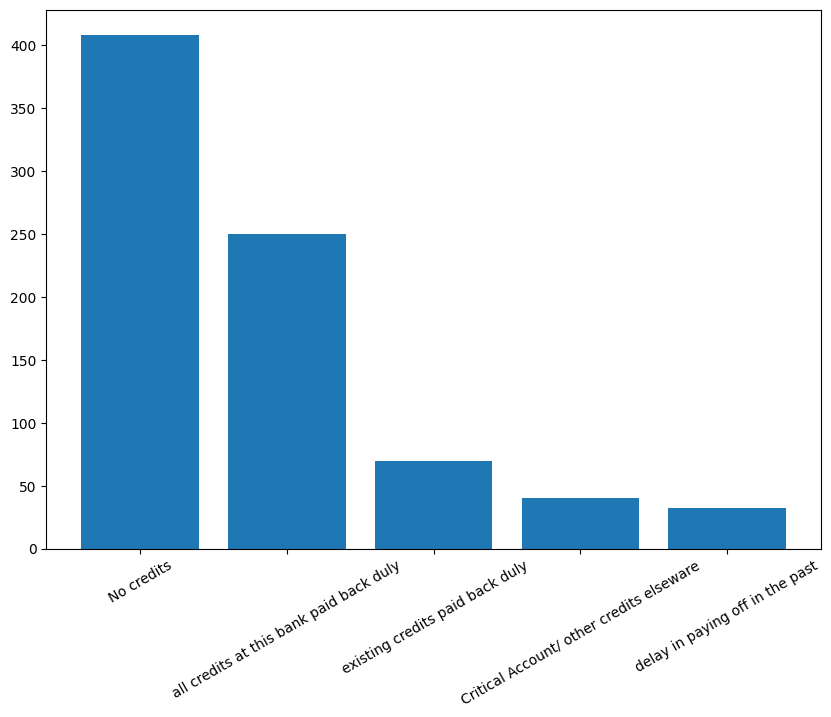

In [29]:
fig,ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.bar(count_credithistory.index, count_credithistory.values)
ax.set_xticklabels(count_credithistory.index, rotation=30)
plt.show()

In [30]:
df_train.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'purpose_description', 'credit_history_description'],
      dtype='object')

In [31]:
df_train['personal_status_sex'].head()

0    2
1    3
2    2
3    3
4    3
Name: personal_status_sex, dtype: int64

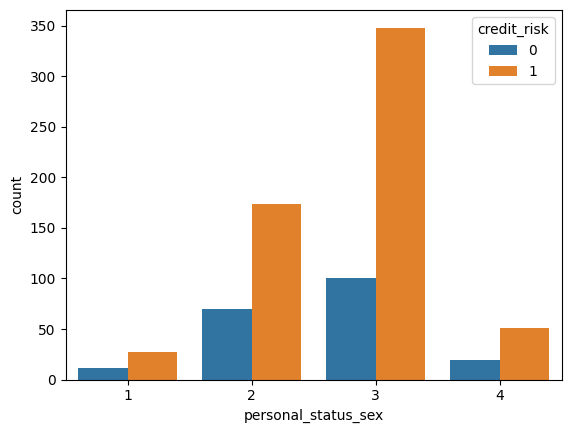

In [32]:
sns.countplot(x='personal_status_sex', hue='credit_risk', data=df_train)

# Show the plot
plt.show()

personal_status_sex<br>
1 : male : divorced/separated<br>
2 : female : non-single or male : single<br>
3 : male : married/widowed<br>
4 : female : single<br>

In [33]:
df_train['personal_status_sex'].value_counts()

3    448
2    244
4     70
1     38
Name: personal_status_sex, dtype: int64

Training on 1 and 4 may create a bias aganist single women and divorced men, however for the initial model, lets ignore it

In [34]:
#lets also check for how the data is distributed in the target variable i.e credit_risk

In [35]:
df_train['credit_risk'].value_counts()

1    600
0    200
Name: credit_risk, dtype: int64

<AxesSubplot: xlabel='credit_risk', ylabel='count'>

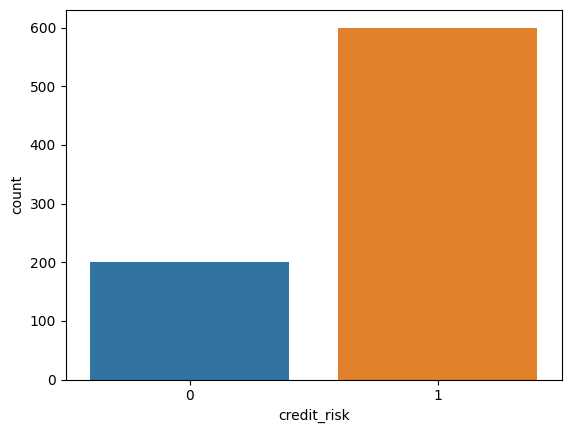

In [36]:
sns.countplot(x='credit_risk',data=df_train)

A highly imbalanced data

In [37]:
#lets have a look at the amount distribution

(array([ 67., 170., 128.,  93.,  75.,  66.,  36.,  25.,  14.,  25.,  19.,
         19.,  11.,   9.,   8.,   5.,   3.,   6.,   1.,   4.,   5.,   1.,
          2.,   3.,   0.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

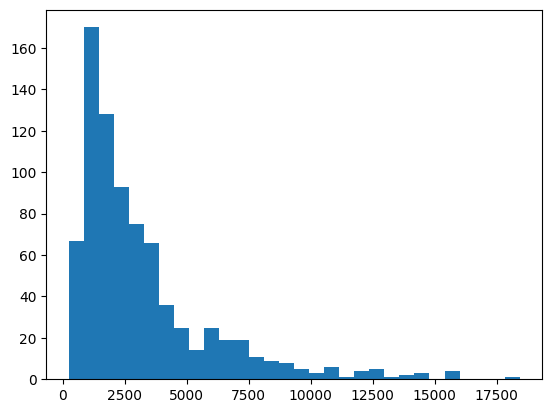

In [38]:
plt.hist(df_train['amount'],bins=30)

C:\Users\Aman Shrivastav\AppData\Local\Temp\ipykernel_14844\2526043278.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_amount,bins=20)


<AxesSubplot: xlabel='amount', ylabel='Density'>

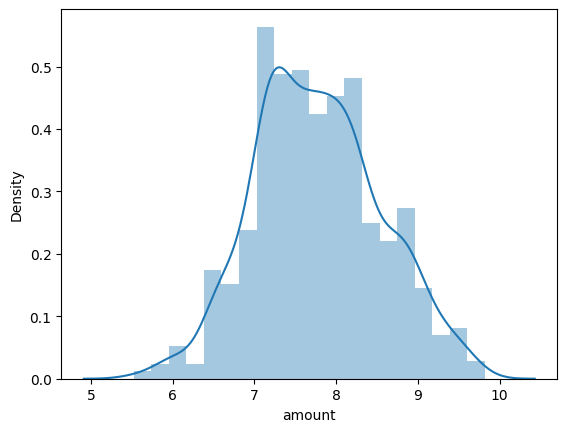

In [39]:
log_amount = np.log(df_train['amount'])
sns.distplot(log_amount,bins=20)

In [40]:
df_train['amount_log'] = round(np.log(df_train['amount']),2)

print(df_train[['amount', 'amount_log']].head())

   amount  amount_log
0    1049        6.96
1    2799        7.94
2     841        6.73
3    2122        7.66
4    2241        7.71


In [41]:
pd.set_option('display.max_columns', None)
df_train.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,purpose_description,credit_history_description,amount_log
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1,car (used),all credits at this bank paid back duly,6.96
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1,others,all credits at this bank paid back duly,7.94
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1,retraining,No credits,6.73
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1,others,all credits at this bank paid back duly,7.66
4,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1,others,all credits at this bank paid back duly,7.71


In [42]:
df_train.drop({'purpose_description','credit_history_description','amount'},axis=1,inplace=True)

In [43]:
df_train.head()

,status,duration,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,amount_log
0,1,18,4,2,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1,6.96
1,1,9,4,0,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1,7.94
2,2,12,2,9,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1,6.73
3,1,12,4,0,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1,7.66
4,1,10,4,0,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1,7.71


In [44]:
#lets do one thing, lets also see the distribution other columns like age, duration

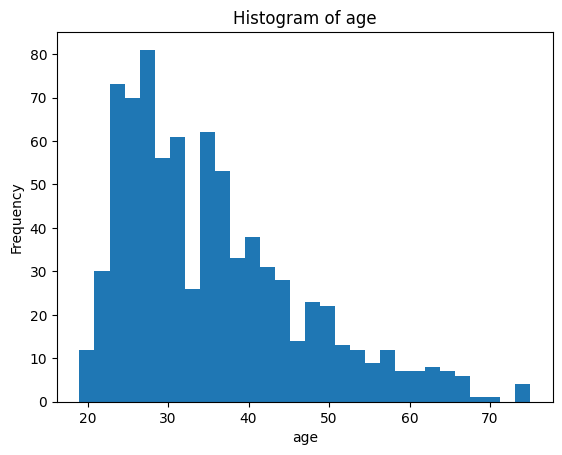

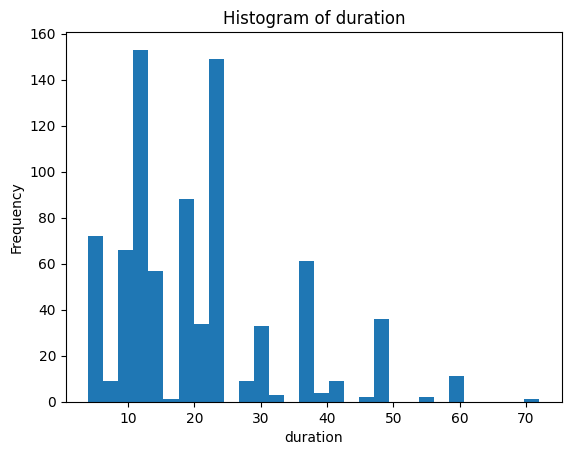

In [45]:
col = ['age', 'duration']

for i in col:
    plt.hist(df_train[i], bins=30)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')
    plt.show()


In [46]:
#lets perform log transformation

In [47]:
df_train['duration_log'] = round(np.log(df_train['duration']),2)
df_train['age_log'] = round(np.log(df_train['age']),2)

C:\Users\Aman Shrivastav\AppData\Local\Temp\ipykernel_14844\489989670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['duration_log'])


<AxesSubplot: xlabel='duration_log', ylabel='Density'>

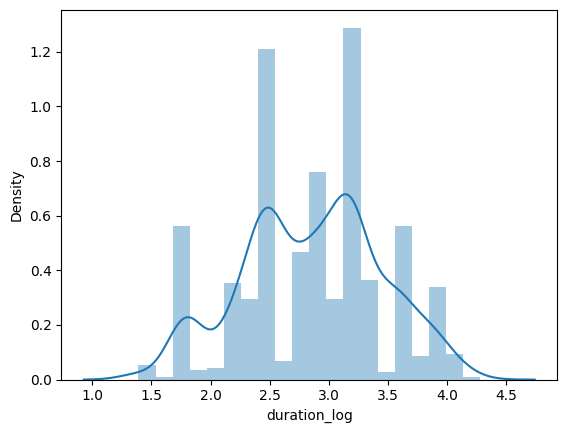

In [48]:
sns.distplot(df_train['duration_log'])

C:\Users\Aman Shrivastav\AppData\Local\Temp\ipykernel_14844\4082667761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['age_log'])


<AxesSubplot: xlabel='age_log', ylabel='Density'>

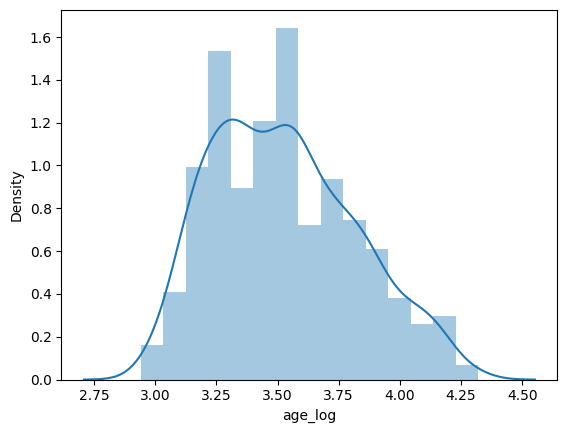

In [49]:
sns.distplot(df_train['age_log'])

In [50]:
df_train.drop({'age','duration'},axis=1,inplace=True)

In [51]:
df_train.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,amount_log,duration_log,age_log
0,1,4,2,1,2,4,2,1,4,2,3,1,1,3,2,1,2,1,6.96,2.89,3.04
1,1,4,0,1,3,2,3,1,2,1,3,1,2,3,1,1,2,1,7.94,2.20,3.58
2,2,2,9,2,4,2,2,1,4,1,3,1,1,2,2,1,2,1,6.73,2.48,3.14
3,1,4,0,1,3,3,3,1,2,1,3,1,2,2,1,1,1,1,7.66,2.48,3.66
4,1,4,0,1,2,1,3,1,3,1,3,1,2,2,1,1,1,1,7.71,2.30,3.87


In [52]:
df_train[df_train['credit_risk']==0].head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,amount_log,duration_log,age_log
600,1,2,0,1,2,4,2,1,3,3,3,1,1,3,2,2,2,0,7.10,2.89,3.14
601,4,4,6,2,3,4,2,1,2,1,3,2,2,3,2,1,2,0,7.53,2.89,3.40
602,1,2,0,1,3,4,2,1,2,1,3,2,1,2,2,1,2,0,7.11,2.48,3.18
603,2,2,0,1,4,2,4,1,3,3,1,2,1,2,2,1,2,0,6.53,2.48,3.22
604,3,2,3,1,3,3,2,1,2,1,3,2,1,2,2,1,2,0,6.61,2.20,3.33


In [53]:
# lets perform oversampling

In [54]:
df_train['credit_risk'].value_counts()

1    600
0    200
Name: credit_risk, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE

# Split the data into features (X) and the target variable (y)
X = df_train.drop('credit_risk', axis=1)
y = df_train['credit_risk']

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples for the minority class
X_smote, y_smote = smote.fit_resample(X, y)

# Create a new DataFrame with the SMOTE-generated features and labels
df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame({'credit_risk': y_smote})], axis=1)

# Check the class distribution in the new DataFrame
print(df_smote['credit_risk'].value_counts())


1    600
0    600
Name: credit_risk, dtype: int64


In [56]:
df_smote.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,amount_log,duration_log,age_log,credit_risk
0,1,4,2,1,2,4,2,1,4,2,3,1,1,3,2,1,2,6.96,2.89,3.04,1
1,1,4,0,1,3,2,3,1,2,1,3,1,2,3,1,1,2,7.94,2.20,3.58,1
2,2,2,9,2,4,2,2,1,4,1,3,1,1,2,2,1,2,6.73,2.48,3.14,1
3,1,4,0,1,3,3,3,1,2,1,3,1,2,2,1,1,1,7.66,2.48,3.66,1
4,1,4,0,1,2,1,3,1,3,1,3,1,2,2,1,1,1,7.71,2.30,3.87,1


In [57]:
df_smote.shape

(1200, 21)

In [58]:
#Since its a classification problem we will be using Logistic Regression, Random Forest, SVM, KNN

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [61]:
x = df_train.drop('credit_risk', axis=1)
y = df_train['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipelines = {
    'KNN': Pipeline([('classifier', KNeighborsClassifier(n_neighbors=5))]),
    'SVM': Pipeline([('classifier', SVC(kernel='linear'))]),
    'RandomForest': Pipeline([('classifier', RandomForestClassifier(n_estimators=100, random_state=42))]),
    'DecisionTree': Pipeline([('classifier', DecisionTreeClassifier(random_state=42))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


KNN:
Accuracy: 0.7125
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.22      0.30        45
           1       0.75      0.90      0.82       115

    accuracy                           0.71       160
   macro avg       0.61      0.56      0.56       160
weighted avg       0.67      0.71      0.67       160


SVM:
Accuracy: 0.75625
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.27      0.38        45
           1       0.77      0.95      0.85       115

    accuracy                           0.76       160
   macro avg       0.72      0.61      0.61       160
weighted avg       0.74      0.76      0.72       160


RandomForest:
Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.29      0.42        45
           1       0.78      0.97      0.86       115

    accuracy                    

### Random Forest Gives The best outcome